<a href="https://colab.research.google.com/github/Deepak-Leveledge/Disease_predictions/blob/main/Disease_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [22]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

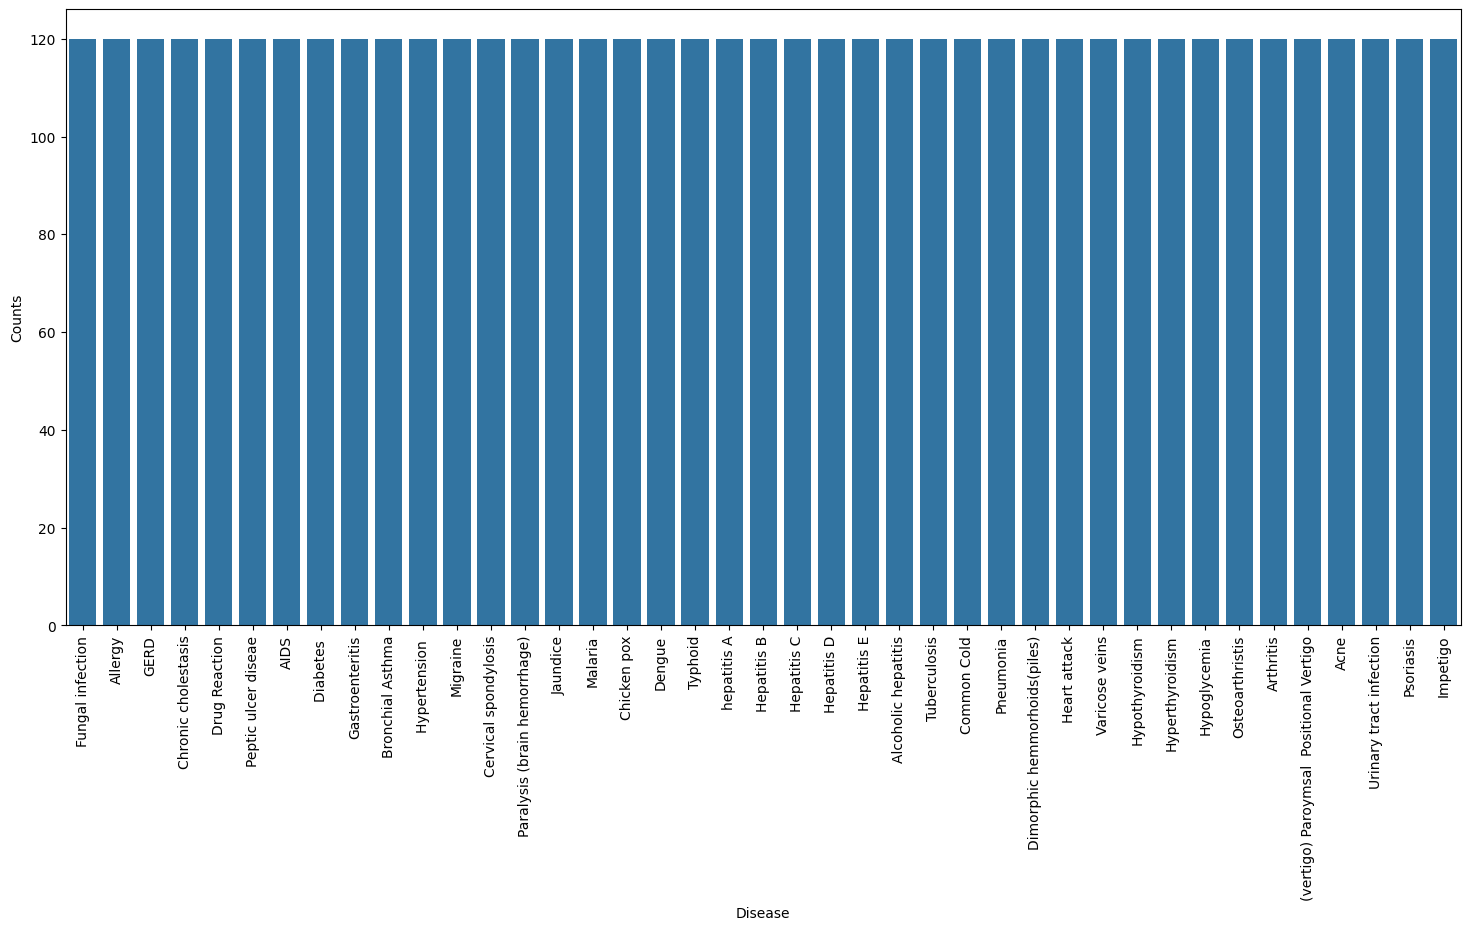

In [12]:
data=pd.read_csv("/content/Training.csv").dropna(axis=1)
# print(data.head())
# checking the whether the dataset is blanced or not
disease_counts=data["prognosis"].value_counts()
# print(disease_counts) #counting the data of the that column like how many differnt desiese are there and there count
temp_df=pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts":disease_counts.values
})
# print(temp_df) # showing the column with the index value

plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()



In [16]:
# Encoding the targert value (prognessis) for converting from string to numerical value for model traning
# thats way we use label encoder

encoder=LabelEncoder()
data["prognosis"]=encoder.fit_transform(data["prognosis"])
# print(data["prognosis"])


In [18]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.2,random_state=24)

print(f"Tarin : {X_train.shape},{y_train.shape}")
print(f"Test : {X_test.shape},{y_test.shape}")

Tarin : (3936, 132),(3936,)
Test : (984, 132),(984,)


In [23]:
def cv_scoring(estimator,X,y):
  return accuracy_score(y,estimator.predict(X))


# model initilization
models= {
    "SVC":SVC(),
    "GaussianNB":GaussianNB(),
    "RandomForestClassifier":RandomForestClassifier(random_state=18)
}


for model_name in models:
  model=models[model_name]
  scores= cross_val_score(model,X,y,
                          cv=10, #Data set ko 10 parts(fold) me divide kar raha hai
                          n_jobs= -1, # for faster computations
                          scoring=cv_scoring)


  print("=="*30)
  print(model_name)
  print(f"Scores:{scores}")
  print(f"Mean Score:{np.mean(scores)}")


SVC
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
GaussianNB
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0
RandomForestClassifier
Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score:1.0


Accuracy on te training Data by SVM :- 100.0
Accuracy on te testing Data by SVM :- 100.0
[[32  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0 22]]


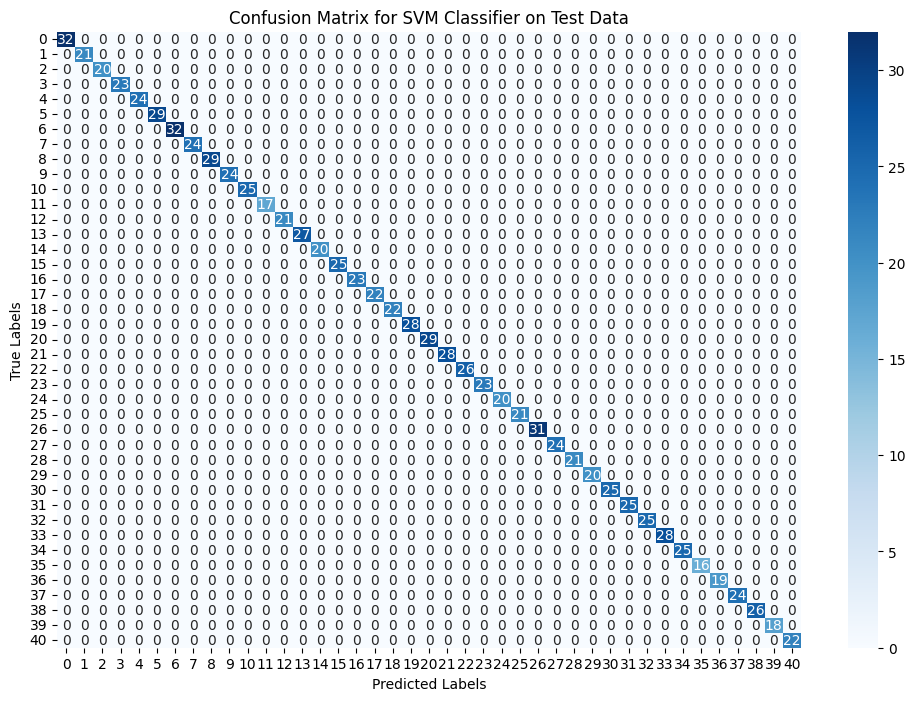

In [41]:
# Building strong classifier by combinnig all Data

# Training and testing on SVM model
from sklearn.metrics import accuracy_score,confusion_matrix

svm_model=SVC()
svm_model.fit(X_train,y_train)
predictions= svm_model.predict(X_test)

print(f"Accuracy on te training Data by SVM :- {accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on te testing Data by SVM :- {accuracy_score(y_test,predictions)*100}")

# implementinf confussion matrics
confusion_matrix=confusion_matrix(y_test,predictions)
print(confusion_matrix)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy on the training Data by Naive Bayes :- 100.0
Accuracy on the testing Data by Naive Bayes :- 100.0


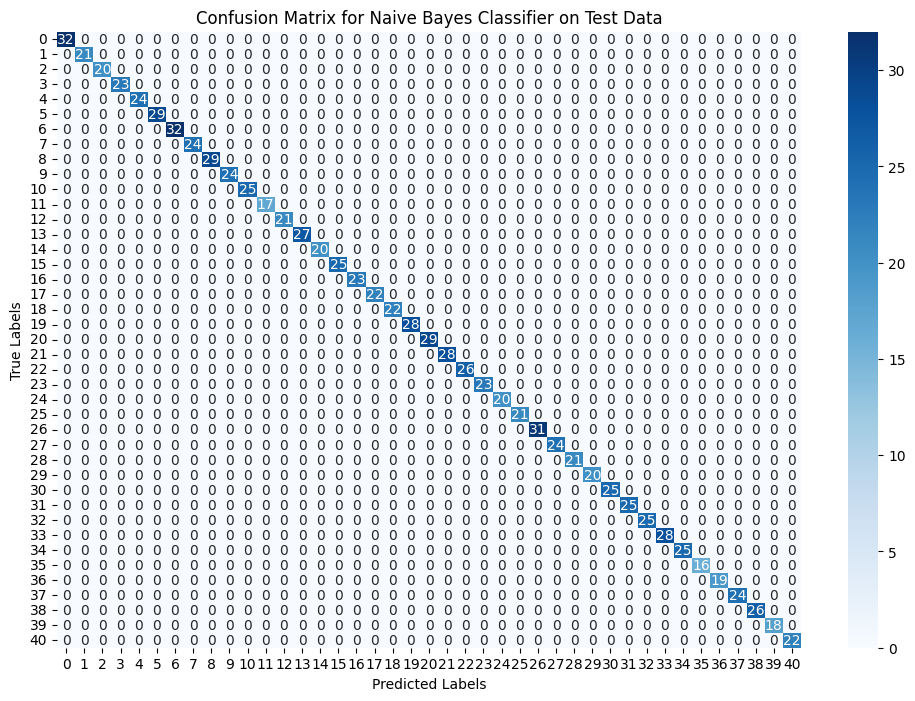

In [43]:

# Training and testing Naive Bayes Classifier
from sklearn.metrics import accuracy_score,confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print(f"Accuracy on the training Data by Naive Bayes :- {accuracy_score(y_train, nb_model.predict(X_train)) * 100}")
print(f"Accuracy on the testing Data by Naive Bayes :- {accuracy_score(y_test, nb_predictions) * 100}")

# Implementing confusion matrix - use nb_cm for Naive Bayes' confusion matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


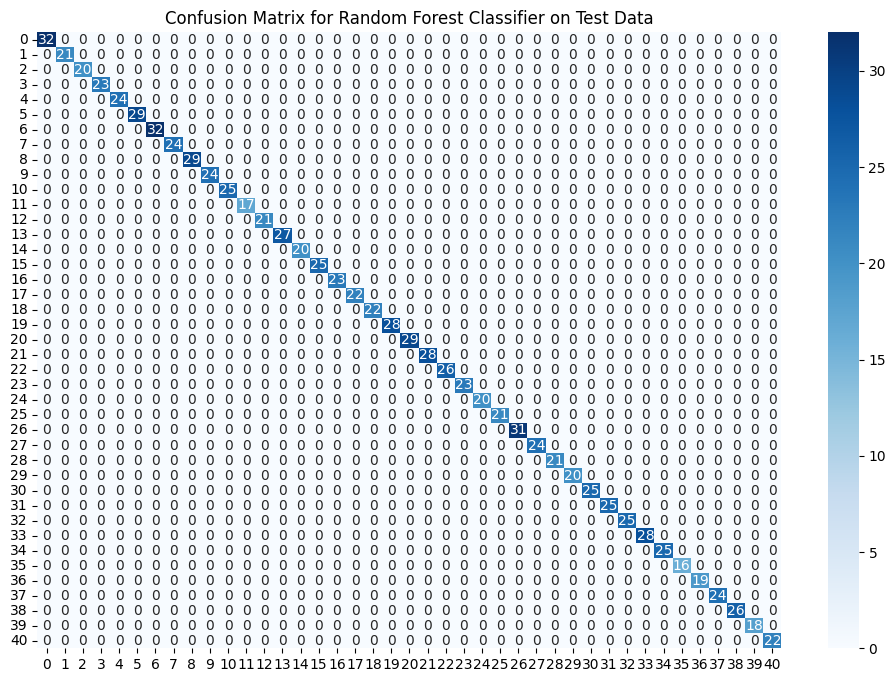

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accurancy on the testing Data :-2.380952380952381


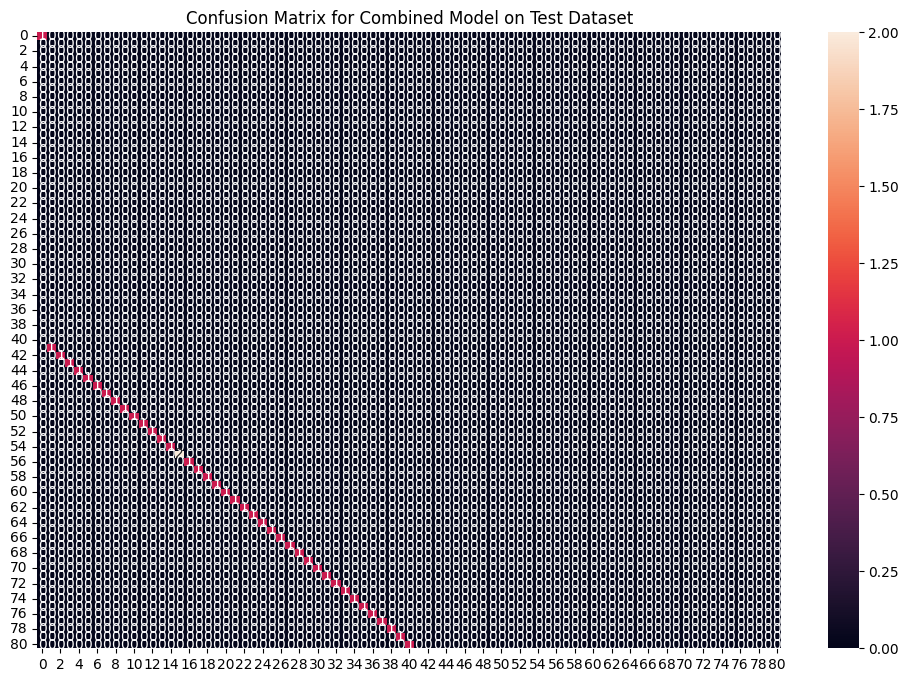

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Traning the models on the whole data

final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)


# Reading the Test data
test_data=pd.read_csv("/content/Testing.csv")

test_X=test_data.iloc[:,:-1]
all_prognosis = pd.concat([data["prognosis"].astype(str), test_data.iloc[:, -1].astype(str)]).unique()
encoder.fit(all_prognosis) # Fit encoder on string valuetest_Y=encoder.transform(test_data.iloc[:, -1])
test_Y=encoder.transform(test_data.iloc[:, -1]) # Transform test labels

#Doing the prediction by taking the mode of predictions
svm_predictions=final_svm_model.predict(test_X)
nb_predictions=final_nb_model.predict(test_X)
rf_predictions=final_rf_model.predict(test_X)


!pip install scipy
from scipy import stats

# FInal prediciton by all the models
final_predictions=[stats.mode([a,b,c])[0] for a,b,c in zip(svm_predictions,nb_predictions,rf_predictions)]

print(f"Accurancy on the testing Data :-{accuracy_score(test_Y,final_predictions)*100}")

cf_matrix = confusion_matrix(test_Y, final_predictions)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()



In [72]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

     # generating individual outputs
    rf_prediction = final_rf_model.predict(input_data)[0]
    nb_prediction = final_nb_model.predict(input_data)[0]
    svm_prediction = final_svm_model.predict(input_data)[0]


    # making final prediction by taking mode of all predictions
    import statistics

    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])

    predictions = {
        "rf_model_prediction": encoder.classes_[rf_prediction],
        "naive_bayes_prediction": encoder.classes_[nb_prediction],
        "svm_model_prediction": encoder.classes_[svm_prediction],
        "final_prediction": encoder.classes_[final_prediction],
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

# This code is modified by Susobhan Akhuli


{'rf_model_prediction': '21', 'naive_bayes_prediction': '21', 'svm_model_prediction': '21', 'final_prediction': '21'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
